# **Dependancies**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from commons import mean_absolute_percentage_error
from keras.layers import *
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
import tensorflow as tf

# **Loading Data**

In [52]:
PATH_TO_DATA = "cls_interval121-24.csv"
data = pd.read_csv(PATH_TO_DATA)

In [53]:
#data = data.tail(500)

In [54]:
data.shape

(1097, 45)

In [55]:
X = data.iloc[:,:-1]

In [56]:
y=data.iloc[:,-1:]

In [57]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, train_size=0.8, shuffle=False, random_state=7)

In [58]:
X_train.shape

(877, 44)

In [59]:
y_train

,category
0,0
1,0
2,0
3,0
4,0
...,...
872,1
873,1
874,1
875,1


In [60]:
estimators=[]

In [61]:
estimators.append(['robust',RobustScaler()])

In [62]:
estimators.append(['mixmax',MinMaxScaler()])

In [63]:
scale=Pipeline(estimators,verbose=True)

In [64]:
X_train=scale.fit_transform(X_train)

[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing mixmax, total=   0.0s


In [65]:
X_test=scale.transform(X_test)

In [66]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [67]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [68]:
y_train=y_train.values

In [69]:
y_train

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [70]:
unique1, id1 = np.unique(y_train, return_inverse=True)

In [71]:
y_train=to_categorical(id1,num_classes=2)

In [72]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [73]:
X_train.shape

(877, 1, 44)

In [74]:
y_train.shape

(877, 2)

In [75]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [76]:
y_train=np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))

In [77]:
y_test=y_test.values

In [78]:
#y_test

In [79]:
#unique1, id1 = np.unique(y_test, return_inverse=True)
#y_test = to_categorical(id1, num_classes=2)

In [80]:
#y_test=np.reshape(y_test, (y_test.shape[0],1,y_test.shape[1]))

In [81]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# **Model Architecture + Training**

In [82]:

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [83]:
adam = optimizers.Adam(learning_rate=lr_schedule(0), amsgrad=True)


Learning rate:  0.001


In [84]:
model = Sequential()
model.add(Bidirectional(LSTM(80, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])))
model.add(Bidirectional(LSTM(100, return_sequences=True, activation='relu')))
#model.add(Bidirectional(LSTM(40, return_sequences=True, activation='relu')))
model.add(Dense(2,activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

E:\DS440proj\BTCpred\.venv\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
mcp_save = ModelCheckpoint('LSTM_cls_interval3.keras', save_best_only=True, monitor='val_loss', mode='max')
earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='max')

In [86]:
model.fit(X_train,y_train, epochs=1500, batch_size=32, validation_split=0.1,validation_freq=1, shuffle=False, callbacks=[mcp_save,earlyStopping])

Epoch 1/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5765 - loss: 0.6951 - val_accuracy: 0.5227 - val_loss: 0.6943
Epoch 2/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5765 - loss: 0.6845 - val_accuracy: 0.5227 - val_loss: 0.6943
Epoch 3/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 0.6822 - val_accuracy: 0.5227 - val_loss: 0.6948
Epoch 4/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 0.6758 - val_accuracy: 0.4773 - val_loss: 0.6967
Epoch 5/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.6639 - val_accuracy: 0.4773 - val_loss: 0.7054
Epoch 6/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7470 - loss: 0.6393 - val_accuracy: 0.4773 - val_loss: 0.7468
Epoch 7/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 0.5954 - val_accuracy: 0.4773 - val_loss: 0.9494
Epoch 8/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8118 - loss: 0.5275 - val_accuracy: 0

# **Testing Model**

In [87]:
#prediction_model = load_model('trained_models/LSTM_cls_interval3.keras',compile=False)

In [88]:
# Make predictions with the model
predictions = model.predict(X_test)
# Using np.argmax on the last axis to convert probability predictions to class index predictions
y_pred = np.argmax(predictions, axis=-1)  # This will keep the first two dimensions intact

# Check if y_pred shape matches y_test's structure without the class probabilities
print("Shape of y_pred:", y_pred.shape)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Shape of y_pred: (220, 1)


In [89]:
predictions

array([[[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[0.00000000e+00, 1.00000000e+00]],

       [[1.12207184e-12, 1.00000000e+00]],

       [[8.26728172e-13, 1.00000000e+00]],

       [[1.14372270e-12, 1.00000000e+00]],

       [[1.15972574e-12, 1.00000000e+00]],

       [[8.45349344e-13, 1.00000000e+00]],

       [[7.35520423e-13, 1.00000000e+00]],

       [[9.69991123e-13, 1.00000000e+00]],

       [[2.24133711e-02, 9.77586567e-01]],

       [[1.96187235e-02, 9.80381310e-01]],

       [[1.20416563e-02, 9.87958312e-01]],

       [[1.17079755e-02, 9.88292

In [90]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [91]:
y_test.shape

(220, 1)

In [92]:
acc=accuracy_score(y_test,y_pred)
acc

0.6818181818181818

In [93]:
f1=f1_score(y_test,y_pred,average='binary')
f1

0.7865853658536586

In [94]:
auc=roc_auc_score(y_test,y_pred)
auc

0.6128205128205129

In [95]:
y_prob=[model.predict(X_test).max() for i in range(len(y_test))]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━

In [96]:
print(classification_report(y_test,y_pred,labels=[0,1], target_names=['decrease','increase']))

              precision    recall  f1-score   support

    decrease       0.95      0.23      0.38        90
    increase       0.65      0.99      0.79       130

    accuracy                           0.68       220
   macro avg       0.80      0.61      0.58       220
weighted avg       0.78      0.68      0.62       220



In [97]:
predictions=pd.DataFrame(zip(np.ravel(y_test),np.ravel(y_pred)),columns=['y_test','y_pred'])

In [98]:
predictions

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
215,0,0
216,0,0
217,0,0
218,0,0


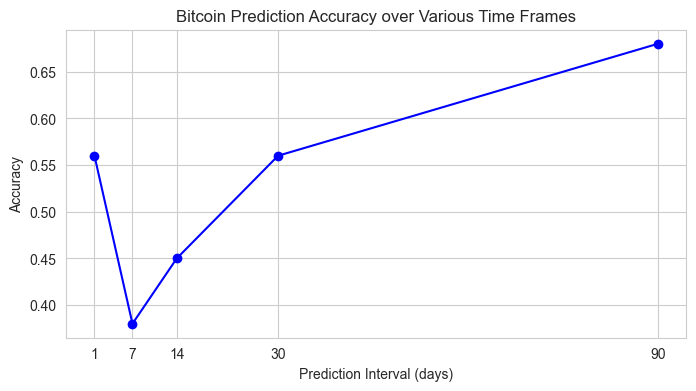

In [101]:
import matplotlib.pyplot as plt

# Data for prediction accuracy
days = [1, 7, 14, 30, 90]
accuracies = [0.56, 0.38, 0.45, 0.56, 0.68]

# Creating the plot
plt.figure(figsize=(8, 4))
plt.plot(days, accuracies, marker='o', linestyle='-', color='b')
plt.title('Bitcoin Prediction Accuracy over Various Time Frames')
plt.xlabel('Prediction Interval (days)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(days)  # Ensures that all days are used as x-ticks
plt.show()

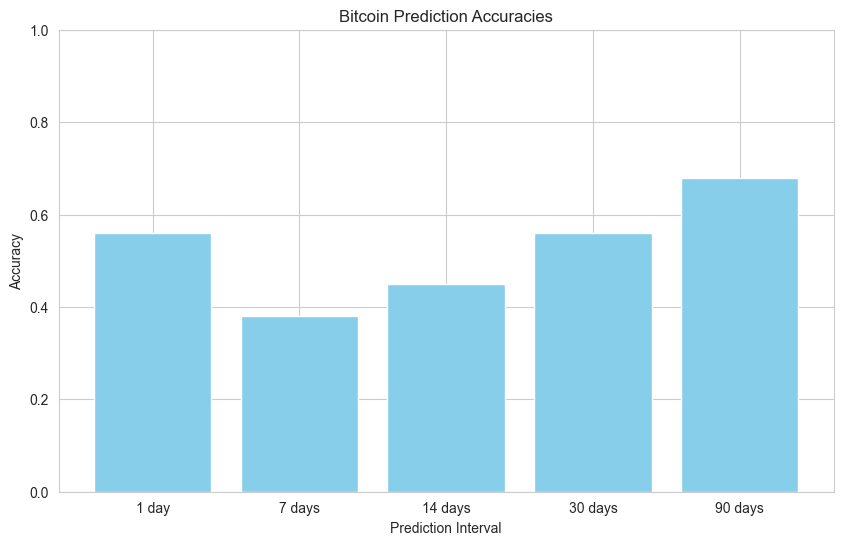

In [103]:
import matplotlib.pyplot as plt

# Data for the predictions and their corresponding accuracies
predictions = ['1 day', '7 days', '14 days', '30 days', '90 days']
accuracies = [0.56, 0.38, 0.45, 0.56, 0.68]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(predictions, accuracies, color='skyblue')

plt.title('Bitcoin Prediction Accuracies')
plt.xlabel('Prediction Interval')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis range to show accuracies from 0 to 1 for clarity
plt.show()